# Master M2 MVA 2018/2019 - Graphical models - HWK 1

## Page 1: mathematical formulas and computations

### 1. Learning in discrete graphical models

Consider the following model : $z$ and $x$ are discrete variables taking respectively $M$ and $K$ different values with $p(z = m) = \pi_m$ and $p(x = k|z = m) = \theta_{mk}$.

Compute the maximum likelihood estimator for $\pi$ and $\theta$ based on an i.i.d. sample of observations. Please provide succinctly your derivations and not just the final answer.

#### Answer:

For variables $(X_i, Z_i)$, $i = 1...N$, let $n_{mk}$ be the number of occurences of $z = m$ and $x = k$. Then:

- $\hat{\pi_m} = \dfrac{1}{N} \times \sum \limits_{k=1}^K n_{mk}$

- $\hat{\theta_{mk}} = \dfrac{n_{mk}}{\sum \limits_{k=1}^K n_{mk}}$

#### Computations:

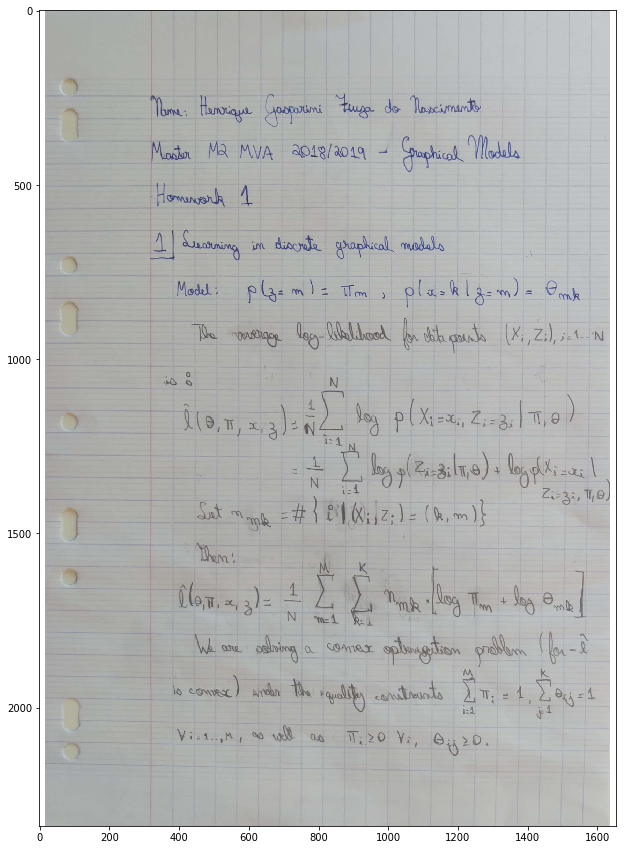

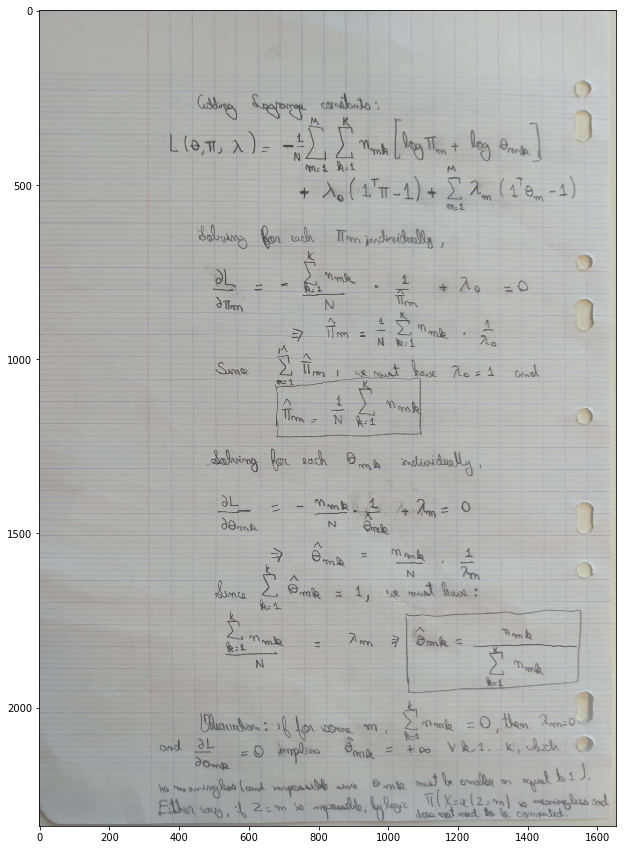

### 2. Linear classification

The files _classificationA.train_, _classificationB.train_ and _classificationC.train_ contain samples of data $(x_n, y_n)$ where $x_n \in \mathbb{R}^2$ and $y_n \in {0, 1}$ (each line of each file contains the $2$ components of $x_n$ then $y_n$.). The goal of this exercise is to implement linear classification methods and to test them on the three data sets. The choice of the programming language is yours (we however recommend Python, Matlab, Scilab, Octave, or R). The source code should be handed in along with results.

Do not forget to use the page formatting imposed in Section 3.

#### 1. Generative model (LDA)

Given the class variable, the data are assumed to be Gaussian with different means for different classes but with the same covariance matrix.

$y \sim Bernoulli(\pi), x|{y = i} \sim Normal(\mu_i, \Sigma)$

__(a)__ Derive the form of the maximum likelihood estimator for this model. Indi- cation : the model was presented in class but not the MLE computations. Compare $p(y = 1|x)$ with the form of logistic regression.

#### Answer:

We compute:

- $\hat{\pi} = \dfrac{n_1}{n_0 + n_1}$, where $n_0$ and $n_1$ are, respectively, the number of 0s and 1s in the training examples

- $\hat{\mu_1} = \dfrac{\sum \limits_{i = 1 \mid y_i = 1} x_i}{n_1}$

- $\hat{\mu_0} = \dfrac{\sum \limits_{i = 1 \mid y_i = 0} x_i}{n_0}$


- $\hat{\Sigma} = \dfrac{\sum \limits_{i = 1 \mid y_i = 1} (x_i - \mu_1)(x_i -\mu_1)^T  + \sum \limits_{i = 1 \mid y_i = 0} (x_i - \mu_0)(x_i -\mu_0)^T}{N}$


- $\mathbb{P}(y = 1 | x) = \dfrac{1}{1 + \dfrac{\pi}{1 - \pi} \exp(-(\mu_1 - \mu_0)^T \Sigma^{-1}  (x - \dfrac{\mu_1 + \mu_0}{2}))}$


- $\log(\dfrac{\mathbb{P}(y = 1 | x)}{\mathbb{P}(y = 0 | x)}) = \log(\dfrac{\pi}{1 - \pi}) + (\mu_1 - \mu_0)^T \Sigma^{-1}  (x - \dfrac{\mu_1 + \mu_0}{2})$

We can observe that, as in logistic regression, the log-ratio $\log(\dfrac{\mathbb{P}(y = 1 | x)}{\mathbb{P}(y = 0 | x)})$ also is linear on $x$.

In LDA we allow the intercept (the $b$ term) to be non zero. In logistic regression, to have that, one usually appends an always-1 column to $x$.

Another remark is that the coefficients for this linear function are obtained from maximizing different log-likelihoods in LDA and logistic regression, and therefore should have different values.

#### Computations:

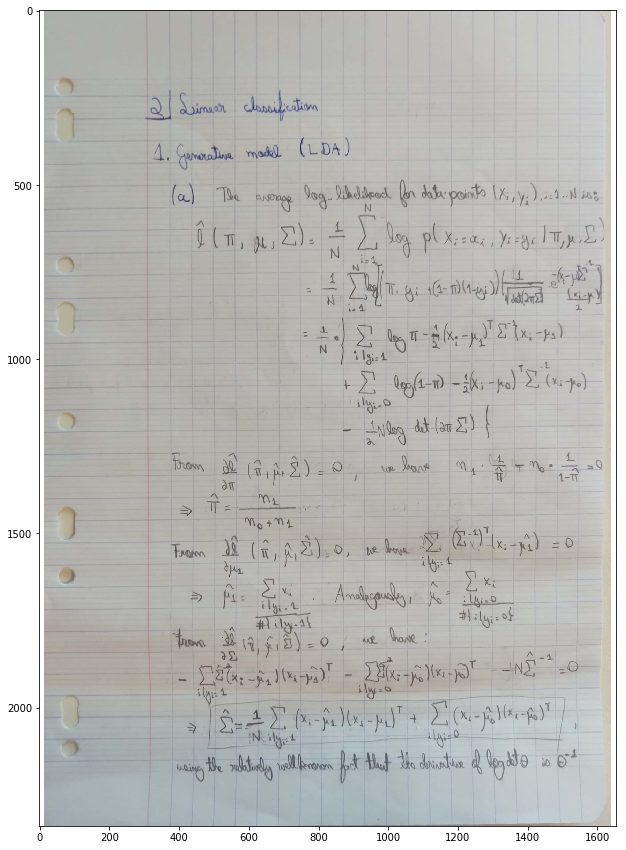

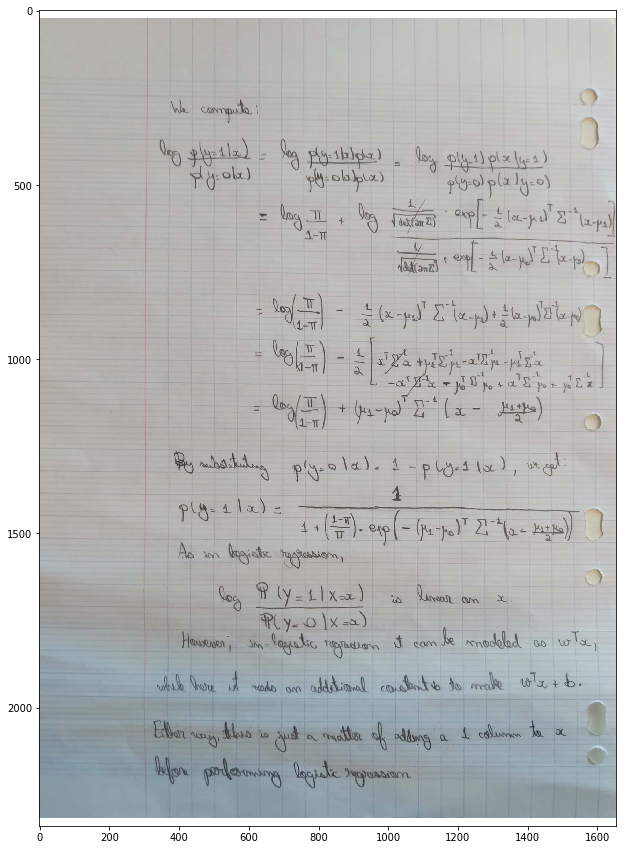

#### 5. QDA model

We finally relax the assumption that the covariance matrices for the two classes are the same. So, given the class label the data are assumed to be Gaussian with means and covariance matrices which are a priori different.

$y \sim Bernoulli(\pi), x \mid y = i ∼ Normal(\mu_i, \Sigma_i)$.

Implement the maximum likelihood estimator and apply it to the data.

__(a)__ Derive the form of the maximum likelihood estimator for this model.

#### Answer:

We compute:

- $\hat{\pi} = \dfrac{n_1}{n_0 + n_1}$, where $n_0$ and $n_1$ are, respectively, the number of 0s and 1s in the training examples

- $\hat{\mu_1} = \dfrac{\sum \limits_{i = 1 \mid y_i = 1} x_i}{n_1}$

- $\hat{\mu_0} = \dfrac{\sum \limits_{i = 1 \mid y_i = 0} x_i}{n_0}$


- $\hat{\Sigma_1} = \dfrac{\sum \limits_{i = 1 \mid y_i = 1} (x_i - \mu_1)(x_i -\mu_1)^T}{n_1}$


- $\hat{\Sigma_0} = \dfrac{\sum \limits_{i = 1 \mid y_i = 0} (x_i - \mu_0)(x_i -\mu_0)^T}{n_0}$

#### Computations:

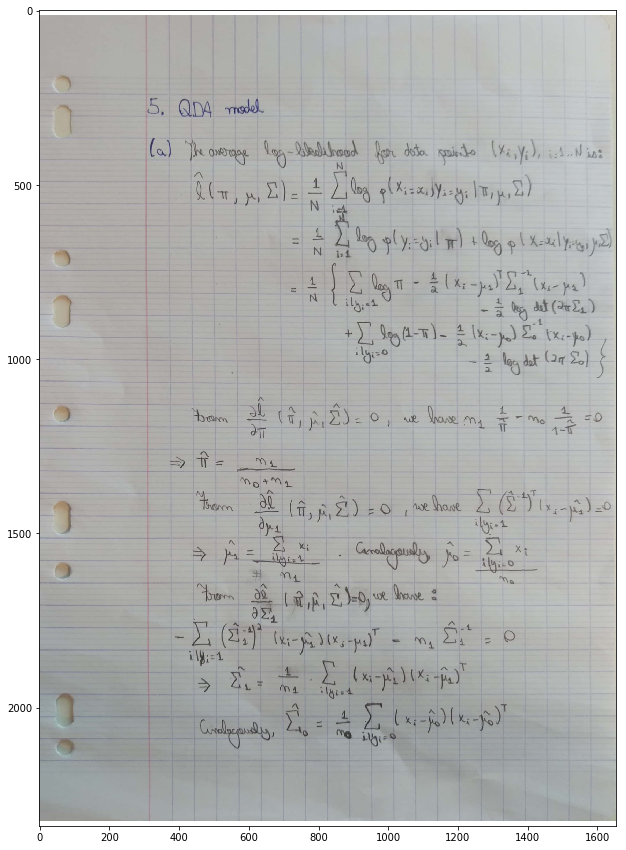

## Page 2: dataset A

### Imports

In [332]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

### Reading the dataset

In [321]:
dataset_name = 'A'

In [322]:
def read(dataset_name):
    train_path, test_path = ['data/' + filename for filename in ['classification{}.train'.format(dataset_name), 'classification{}.test'.format(dataset_name)]]
    train_df = pd.read_csv(train_path, delimiter='\t', header=None)
    train_df.columns = ['x1', 'x2', 'y']
    test_df = pd.read_csv(test_path, delimiter='\t', header=None)
    test_df.columns = ['x1', 'x2', 'y']
    return train_df, test_df

In [323]:
train_df, test_df = read(dataset_name)

In [324]:
def points_from_df(df):
    x1s, x2s, ys = df['x1'].values, df['x2'].values, df['y'].values
    return [np.array([x1, x2]) for x1, x2 in zip(x1s, x2s)], ys

In [325]:
X_train, Y_train = points_from_df(train_df)
X_test, Y_test = points_from_df(test_df)

### LDA

In [227]:
class LDAClassifier:
    # Model estimation with MLE
    def fit(self, X, Y):
        n0, n1 = len([y for y in Y if y == 0.0]), len([y for y in Y if y == 1.0])
        assert n0 + n1 == Y.shape[0]
        self.pi = n1 / (n0 + n1)
        print('Estimated pi = {}'.format(self.pi))
        
        self.mu0 = sum([x for x, y in zip(X, Y) if y == 0.0]) / n0
        print('Estimated mu_0 = {}'.format(self.mu0))
        self.mu1 = sum([x for x, y in zip(X, Y) if y == 1.0]) / n1
        print('Estimated mu_1 = {}'.format(self.mu1))
        
        self.sigma = np.matrix(1/len(Y) * (sum([(x - self.mu0) * np.atleast_2d(x - self.mu0).T for x, y in zip(X, Y) if y == 0.0]) + sum([(x - self.mu1) * np.atleast_2d(x - self.mu1).T for x, y in zip(X, Y) if y == 1.0])))
        print('Estimated Sigma = {}'.format(self.sigma))
        return self

    def predict_single(self, x):
        log_ratio = np.log(self.pi) - np.log(1 - self.pi) + ((self.mu1 - self.mu0) * np.linalg.inv(self.sigma) * np.atleast_2d(x - (self.mu0 + self.mu1)/2).T)
        return float(int(log_ratio > 0.))
    
    def predict(self, X):
        return np.array([self.predict_single(x) for x in X])

In [228]:
clf = LDAClassifier().fit(X_train, Y_train)

Estimated pi = 0.3333333333333333
Estimated mu_0 = [ 2.89970947 -0.893874  ]
Estimated mu_1 = [-2.69232004  0.866042  ]
Estimated Sigma = [[ 2.44190897 -1.13194024]
 [-1.13194024  0.61375465]]


#### Predict

In [229]:
Y_train_pred = clf.predict(X_train)

In [230]:
Y_pred = clf.predict(X_test)

In [231]:
print('Accuracy on training set: {}'.format(accuracy_score(Y_train_pred, Y_train)))

Accuracy on training set: 0.9866666666666667


In [232]:
print('Accuracy on test set: {}'.format(accuracy_score(Y_pred, Y_test)))

Accuracy on test set: 0.98


#### Plot

In [233]:
h = .02  # step size in the mesh

x_min, x_max = min([x[0] for x in X_test]) - .5, max([x[0] for x in X_test]) + .5
y_min, y_max = min([x[1] for x in X_test]) - .5, max([x[1] for x in X_test]) + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

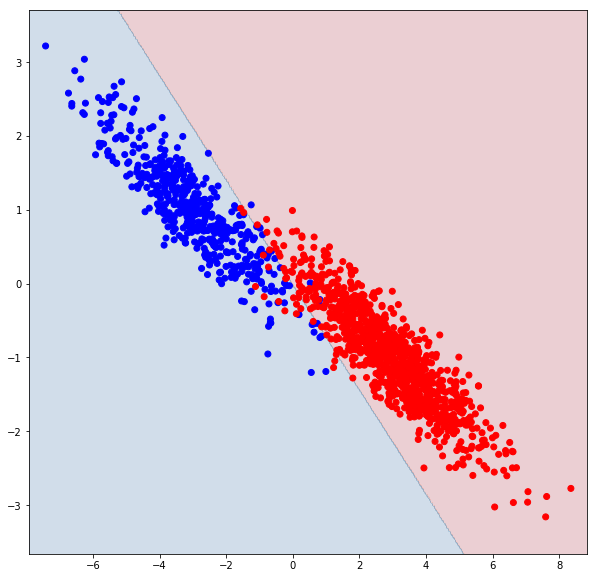

In [234]:
plt.figure(figsize=(10, 10))

cm = plt.cm.RdBu

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.2)

colors = ['b' if y == 1. else 'r' for y in Y_test]
plt.scatter([x[0] for x in X_test], [x[1] for x in X_test], c=colors)
    
plt.show()

### Logistic regression

In [312]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


class LogisticClassifier:
    def compute_hessian(self, w, X, Y):
        N = sigmoid(w.T * X)
        D = np.diag(np.multiply(N, 1. - N).tolist()[0])
        return - X * D * X.T

    def update(self, w, X, Y):
        N = sigmoid(w.T * X)
        D = np.diag(np.multiply(N, 1. - N).tolist()[0])
        hessian = - X * D * X.T
        return w + np.linalg.inv(hessian) * X * (Y - N.T)

    # Model estimation with IRSL in the update method
    def fit(self, X, Y):
        augmented_X = [np.concatenate([x, [1.]]) for x in X_train]
        w = np.matrix(np.zeros((3, 1)))
        input_X, input_Y = np.matrix(augmented_X).T, np.matrix(Y).T
        hessian = self.compute_hessian(w, input_X, input_Y)
        cnt = 0
        while np.abs(np.linalg.det(hessian)) > 10**-7 and cnt < 100:
            w = self.update(w, input_X, input_Y)
            hessian = self.compute_hessian(w, input_X, input_Y)
            cnt += 1
        self.w = w
        return self
    
    def predict_single(self, x):
        return float(int(np.dot(self.w.T, np.concatenate([x, [1.]])) < 0))

    def predict(self, X):
        return np.array([self.predict_single(x) for x in X])

In [313]:
clf = LogisticClassifier().fit(X_train, Y_train)

/home/hfiuza/Programs/virtualenv/ds/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


#### Predict

In [314]:
Y_train_pred = clf.predict(X_train)

In [315]:
Y_pred = clf.predict(X_test)

In [316]:
print('Accuracy on training set: {}'.format(accuracy_score(Y_train_pred, Y_train)))

Accuracy on training set: 0.9933333333333333


In [317]:
print('Accuracy on test set: {}'.format(accuracy_score(Y_pred, Y_test)))

Accuracy on test set: 0.9806666666666667


#### Plot

In [318]:
h = .02  # step size in the mesh

x_min, x_max = min([x[0] for x in X_test]) - .5, max([x[0] for x in X_test]) + .5
y_min, y_max = min([x[1] for x in X_test]) - .5, max([x[1] for x in X_test]) + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

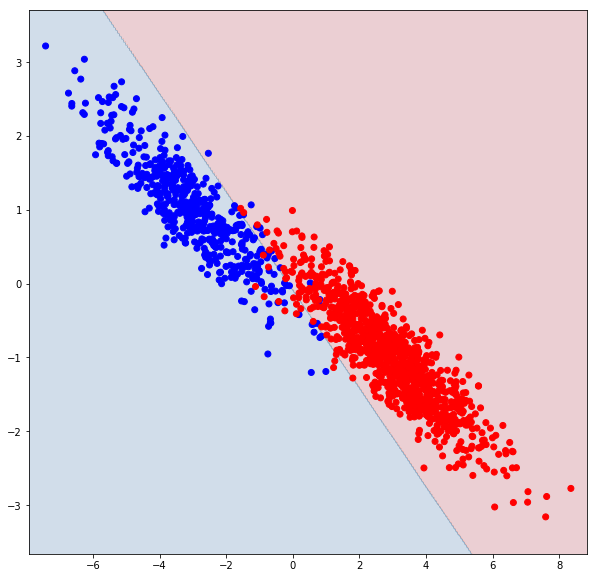

In [319]:
plt.figure(figsize=(10, 10))

cm = plt.cm.RdBu

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.2)

colors = ['b' if y == 1. else 'r' for y in Y_test]
plt.scatter([x[0] for x in X_test], [x[1] for x in X_test], c=colors)
    
plt.show()

### Linear regression

In [326]:
class LinearClassifier:

    def mle_w(self, X, Y):
        return np.linalg.inv(X.T * X) * X.T * Y

    def fit(self, X, Y):
        augmented_X = [np.concatenate([x, [1.]]) for x in X_train]
        input_X, input_Y = np.matrix(augmented_X), np.matrix(Y).T

        self.w = self.mle_w(input_X, input_Y)
        return self
    
    def predict_single(self, x):
        return float(int(np.dot(self.w.T, np.concatenate([x, [1.]])) > 0.5))

    def predict(self, X):
        return np.array([self.predict_single(x) for x in X])

In [327]:
clf = LinearClassifier().fit(X_train, Y_train)

#### Predict

In [328]:
Y_train_pred = clf.predict(X_train)

In [329]:
Y_pred = clf.predict(X_test)

In [330]:
print('Accuracy on training set: {}'.format(accuracy_score(Y_train_pred, Y_train)))

Accuracy on training set: 0.9866666666666667


In [331]:
print('Accuracy on test set: {}'.format(accuracy_score(Y_pred, Y_test)))

Accuracy on test set: 0.9793333333333333


#### Plot

In [249]:
h = .02  # step size in the mesh

x_min, x_max = min([x[0] for x in X_test]) - .5, max([x[0] for x in X_test]) + .5
y_min, y_max = min([x[1] for x in X_test]) - .5, max([x[1] for x in X_test]) + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

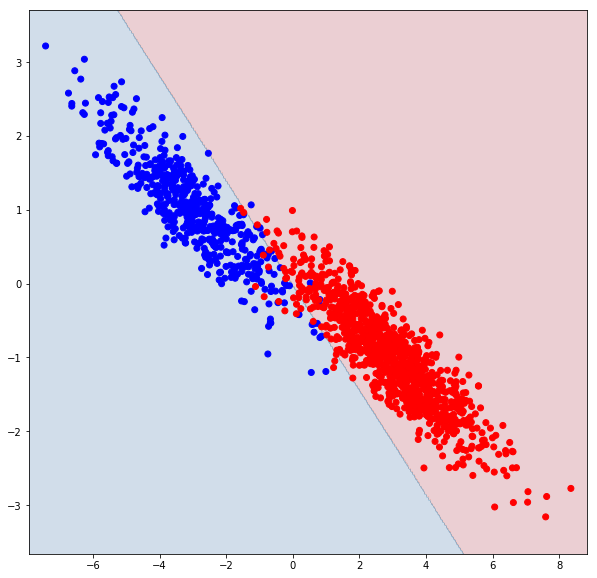

In [250]:
plt.figure(figsize=(10, 10))

cm = plt.cm.RdBu

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.2)

colors = ['b' if y == 1. else 'r' for y in Y_test]
plt.scatter([x[0] for x in X_test], [x[1] for x in X_test], c=colors)
    
plt.show()

### Results summary up to now

In [251]:
lda_train_accuracy, lda_test_accuracy = 0.9866666666666667, 0.98
logistic_train_accuracy, logistic_test_accuracy = 0.9933333333333333, 0.9806666666666667
linear_train_accuracy, linear_test_accuracy = 0.9866666666666667, 0.9793333333333333

__Comment__: the Logistic model gives a slightly better accuracy score in the the test set, but it should not be relevant. The three models give very good results, close to 98% accuracy.

### QDA

In [333]:
class QDAClassifier:
    # Model estimation with MLE
    def fit(self, X, Y):
        n0, n1 = len([y for y in Y if y == 0.0]), len([y for y in Y if y == 1.0])
        assert n0 + n1 == Y.shape[0]
        self.pi = n1 / (n0 + n1)
        print('Estimated pi = {}'.format(self.pi))
        
        self.mu0 = sum([x for x, y in zip(X, Y) if y == 0.0]) / n0
        print('Estimated mu_0 = {}'.format(self.mu0))
        self.mu1 = sum([x for x, y in zip(X, Y) if y == 1.0]) / n1
        print('Estimated mu_1 = {}'.format(self.mu1))
        
        self.sigma0 = np.matrix(1/n0 * sum([(x - self.mu0) * np.atleast_2d(x - self.mu0).T for x, y in zip(X, Y) if y == 0.0]))
        print('Estimated Sigma_0 = {}'.format(self.sigma0))
        self.sigma1 = np.matrix(1/n1 * sum([(x - self.mu1) * np.atleast_2d(x - self.mu1).T for x, y in zip(X, Y) if y == 1.0]))
        print('Estimated Sigma_1 = {}'.format(self.sigma1))
        
        self.var0 = multivariate_normal(mean=self.mu0, cov=self.sigma0)
        self.var1 = multivariate_normal(mean=self.mu1, cov=self.sigma1)
        return self

    def predict_single(self, x):
        return float(int(self.var1.pdf(x) > self.var0.pdf(x)))
    
    def predict(self, X):
        return np.array([self.predict_single(x) for x in X])

In [335]:
clf = QDAClassifier().fit(X_train, Y_train)

Estimated pi = 0.3333333333333333
Estimated mu_0 = [ 2.89970947 -0.893874  ]
Estimated mu_1 = [-2.69232004  0.866042  ]
Estimated Sigma_0 = [[ 2.31065259 -1.04748461]
 [-1.04748461  0.57578403]]
Estimated Sigma_1 = [[ 2.70442172 -1.3008515 ]
 [-1.3008515   0.68969588]]


#### Predict

In [336]:
Y_train_pred = clf.predict(X_train)

In [337]:
Y_pred = clf.predict(X_test)

In [338]:
print('Accuracy on training set: {}'.format(accuracy_score(Y_train_pred, Y_train)))

Accuracy on training set: 0.9866666666666667


In [339]:
print('Accuracy on test set: {}'.format(accuracy_score(Y_pred, Y_test)))

Accuracy on test set: 0.976


#### Plot

In [340]:
h = .02  # step size in the mesh

x_min, x_max = min([x[0] for x in X_test]) - .5, max([x[0] for x in X_test]) + .5
y_min, y_max = min([x[1] for x in X_test]) - .5, max([x[1] for x in X_test]) + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

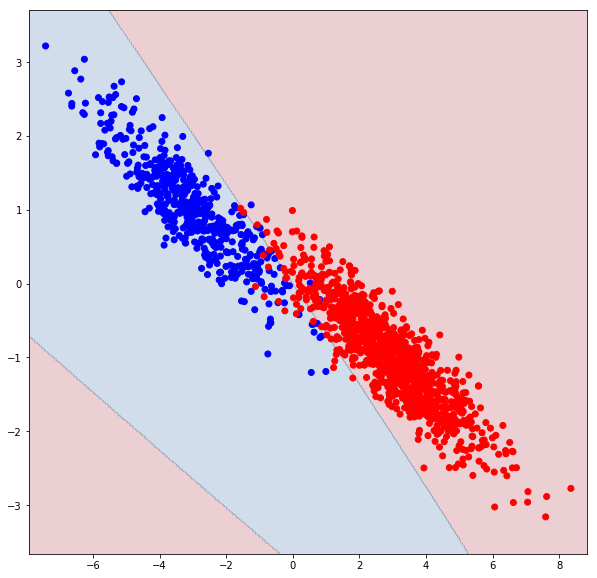

In [341]:
plt.figure(figsize=(10, 10))

cm = plt.cm.RdBu

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.2)

colors = ['b' if y == 1. else 'r' for y in Y_test]
plt.scatter([x[0] for x in X_test], [x[1] for x in X_test], c=colors)
    
plt.show()

#### Comments

This dataset is almost linearly separable, so the QDA model should not bring any advantages. In fact, we observe that it overfits to the training data more than the LDA did, producing worse results than the other 3 models in the test set.

It is also interesting to observe that the estimates for the covariance matrices in QDA are quite close to each other, confirming (well, not so rigorously) that the assumption of LDA was reasonable.

## Page 3: dataset B

### Reading the dataset

In [343]:
dataset_name = 'B'

In [344]:
def read(dataset_name):
    train_path, test_path = ['data/' + filename for filename in ['classification{}.train'.format(dataset_name), 'classification{}.test'.format(dataset_name)]]
    train_df = pd.read_csv(train_path, delimiter='\t', header=None)
    train_df.columns = ['x1', 'x2', 'y']
    test_df = pd.read_csv(test_path, delimiter='\t', header=None)
    test_df.columns = ['x1', 'x2', 'y']
    return train_df, test_df

In [345]:
train_df, test_df = read(dataset_name)

In [346]:
def points_from_df(df):
    x1s, x2s, ys = df['x1'].values, df['x2'].values, df['y'].values
    return [np.array([x1, x2]) for x1, x2 in zip(x1s, x2s)], ys

In [347]:
X_train, Y_train = points_from_df(train_df)
X_test, Y_test = points_from_df(test_df)

### LDA

In [348]:
clf = LDAClassifier().fit(X_train, Y_train)

Estimated pi = 0.5
Estimated mu_0 = [ 3.34068896 -0.83546333]
Estimated mu_1 = [-3.21670734  1.08306733]
Estimated Sigma = [[ 3.34623467 -0.13516489]
 [-0.13516489  1.73807475]]


#### Predict

In [349]:
Y_train_pred = clf.predict(X_train)

In [350]:
Y_pred = clf.predict(X_test)

In [351]:
print('Accuracy on training set: {}'.format(accuracy_score(Y_train_pred, Y_train)))

Accuracy on training set: 0.97


In [352]:
print('Accuracy on test set: {}'.format(accuracy_score(Y_pred, Y_test)))

Accuracy on test set: 0.9585


#### Plot

In [262]:
h = .02  # step size in the mesh

x_min, x_max = min([x[0] for x in X_test]) - .5, max([x[0] for x in X_test]) + .5
y_min, y_max = min([x[1] for x in X_test]) - .5, max([x[1] for x in X_test]) + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

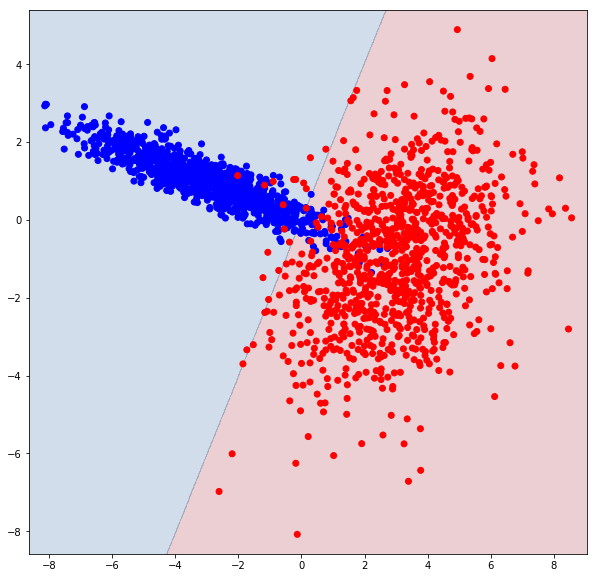

In [263]:
plt.figure(figsize=(10, 10))

cm = plt.cm.RdBu

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.2)

colors = ['b' if y == 1. else 'r' for y in Y_test]
plt.scatter([x[0] for x in X_test], [x[1] for x in X_test], c=colors)
    
plt.show()

### Logistic regression

In [264]:
clf = LogisticClassifier().fit(X_train, Y_train)

/home/hfiuza/Programs/virtualenv/ds/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


#### Predict

In [265]:
Y_train_pred = clf.predict(X_train)

In [266]:
Y_pred = clf.predict(X_test)

In [267]:
print('Accuracy on training set: {}'.format(accuracy_score(Y_train_pred, Y_train)))

Accuracy on training set: 0.9733333333333334


In [268]:
print('Accuracy on test set: {}'.format(accuracy_score(Y_pred, Y_test)))

Accuracy on test set: 0.962


#### Plot

In [269]:
h = .02  # step size in the mesh

x_min, x_max = min([x[0] for x in X_test]) - .5, max([x[0] for x in X_test]) + .5
y_min, y_max = min([x[1] for x in X_test]) - .5, max([x[1] for x in X_test]) + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

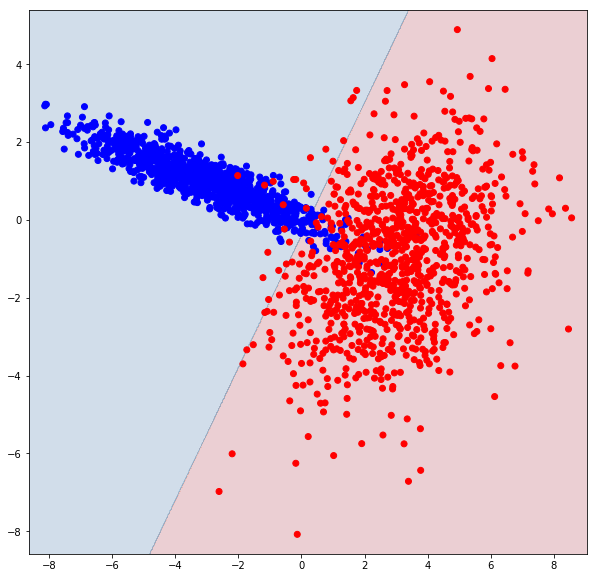

In [270]:
plt.figure(figsize=(10, 10))

cm = plt.cm.RdBu

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.2)

colors = ['b' if y == 1. else 'r' for y in Y_test]
plt.scatter([x[0] for x in X_test], [x[1] for x in X_test], c=colors)
    
plt.show()

### Linear regression

In [271]:
clf = LinearClassifier().fit(X_train, Y_train)

#### Predict

In [272]:
Y_train_pred = clf.predict(X_train)

In [273]:
Y_pred = clf.predict(X_test)

In [274]:
print('Accuracy on training set: {}'.format(accuracy_score(Y_train_pred, Y_train)))

Accuracy on training set: 0.97


In [275]:
print('Accuracy on test set: {}'.format(accuracy_score(Y_pred, Y_test)))

Accuracy on test set: 0.9585


#### Plot

In [276]:
h = .02  # step size in the mesh

x_min, x_max = min([x[0] for x in X_test]) - .5, max([x[0] for x in X_test]) + .5
y_min, y_max = min([x[1] for x in X_test]) - .5, max([x[1] for x in X_test]) + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

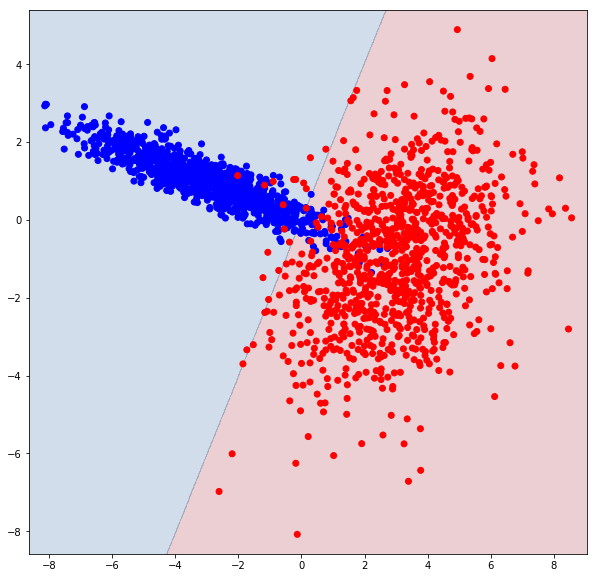

In [277]:
plt.figure(figsize=(10, 10))

cm = plt.cm.RdBu

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.2)

colors = ['b' if y == 1. else 'r' for y in Y_test]
plt.scatter([x[0] for x in X_test], [x[1] for x in X_test], c=colors)
    
plt.show()

### Results summary up to now

In [353]:
lda_train_accuracy, lda_test_accuracy = 0.97, 0.959
logistic_train_accuracy, logistic_test_accuracy = 0.9733333333333334, 0.962 
linear_train_accuracy, linear_test_accuracy = 0.97, 0.9585

__Comment__: the Logistic model again gives a slightly better accuracy score in the the test set, and this time one could say it's considerably higher (96.2% > 95.9%).

### QDA

In [354]:
clf = QDAClassifier().fit(X_train, Y_train)

Estimated pi = 0.5
Estimated mu_0 = [ 3.34068896 -0.83546333]
Estimated mu_1 = [-3.21670734  1.08306733]
Estimated Sigma_0 = [[2.53885859 1.0642112 ]
 [1.0642112  2.96007891]]
Estimated Sigma_1 = [[ 4.15361075 -1.33454097]
 [-1.33454097  0.51607059]]


#### Predict

In [355]:
Y_train_pred = clf.predict(X_train)

In [356]:
Y_pred = clf.predict(X_test)

In [357]:
print('Accuracy on training set: {}'.format(accuracy_score(Y_train_pred, Y_train)))

Accuracy on training set: 0.9866666666666667


In [358]:
print('Accuracy on test set: {}'.format(accuracy_score(Y_pred, Y_test)))

Accuracy on test set: 0.98


#### Plot

In [359]:
h = .02  # step size in the mesh

x_min, x_max = min([x[0] for x in X_test]) - .5, max([x[0] for x in X_test]) + .5
y_min, y_max = min([x[1] for x in X_test]) - .5, max([x[1] for x in X_test]) + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

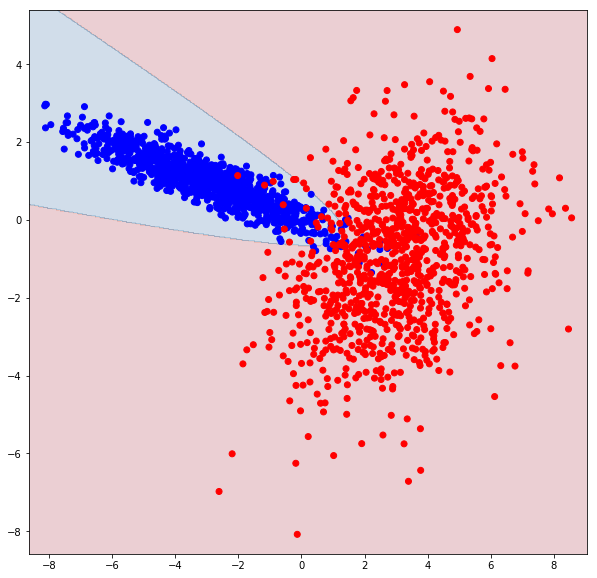

In [360]:
plt.figure(figsize=(10, 10))

cm = plt.cm.RdBu

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.2)

colors = ['b' if y == 1. else 'r' for y in Y_test]
plt.scatter([x[0] for x in X_test], [x[1] for x in X_test], c=colors)
    
plt.show()

#### Comments

This dataset is not linearly separable, so the LDA model was not able to discriminate correctly for some points. On the other hand, the QDA model could find good natural region delimiters and reduce in 50% the error rate.

In addition, one could argue from the visualization that these classes definitely do not share the same covariance matrices. In fact, the estimates from QDA of $\Sigma_0$ and $\Sigma_1$ are quite different from each other.

## Page 3: dataset C

### Reading the dataset

In [361]:
dataset_name = 'C'

In [362]:
def read(dataset_name):
    train_path, test_path = ['data/' + filename for filename in ['classification{}.train'.format(dataset_name), 'classification{}.test'.format(dataset_name)]]
    train_df = pd.read_csv(train_path, delimiter='\t', header=None)
    train_df.columns = ['x1', 'x2', 'y']
    test_df = pd.read_csv(test_path, delimiter='\t', header=None)
    test_df.columns = ['x1', 'x2', 'y']
    return train_df, test_df

In [363]:
train_df, test_df = read(dataset_name)

In [364]:
def points_from_df(df):
    x1s, x2s, ys = df['x1'].values, df['x2'].values, df['y'].values
    return [np.array([x1, x2]) for x1, x2 in zip(x1s, x2s)], ys

In [365]:
X_train, Y_train = points_from_df(train_df)
X_test, Y_test = points_from_df(test_df)

### LDA

In [284]:
clf = LDAClassifier().fit(X_train, Y_train)

Estimated pi = 0.625
Estimated mu_0 = [ 2.79304824 -0.83838667]
Estimated mu_1 = [-2.94232885 -0.9578284 ]
Estimated Sigma = [[ 2.88039225 -0.63405081]
 [-0.63405081  5.19952435]]


#### Predict

In [285]:
Y_train_pred = clf.predict(X_train)

In [286]:
Y_pred = clf.predict(X_test)

In [287]:
print('Accuracy on training set: {}'.format(accuracy_score(Y_train_pred, Y_train)))

Accuracy on training set: 0.945


In [288]:
print('Accuracy on test set: {}'.format(accuracy_score(Y_pred, Y_test)))

Accuracy on test set: 0.9576666666666667


#### Plot

In [289]:
h = .02  # step size in the mesh

x_min, x_max = min([x[0] for x in X_test]) - .5, max([x[0] for x in X_test]) + .5
y_min, y_max = min([x[1] for x in X_test]) - .5, max([x[1] for x in X_test]) + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

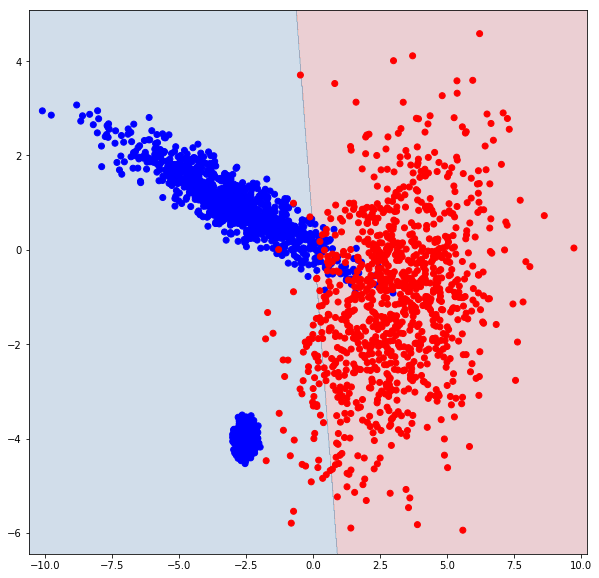

In [290]:
plt.figure(figsize=(10, 10))

cm = plt.cm.RdBu

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.2)

colors = ['b' if y == 1. else 'r' for y in Y_test]
plt.scatter([x[0] for x in X_test], [x[1] for x in X_test], c=colors)
    
plt.show()

### Logistic regression

In [291]:
clf = LogisticClassifier().fit(X_train, Y_train)

/home/hfiuza/Programs/virtualenv/ds/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


#### Predict

In [292]:
Y_train_pred = clf.predict(X_train)

In [293]:
Y_pred = clf.predict(X_test)

In [294]:
print('Accuracy on training set: {}'.format(accuracy_score(Y_train_pred, Y_train)))

Accuracy on training set: 0.945


In [295]:
print('Accuracy on test set: {}'.format(accuracy_score(Y_pred, Y_test)))

Accuracy on test set: 0.9586666666666667


#### Plot

In [296]:
h = .02  # step size in the mesh

x_min, x_max = min([x[0] for x in X_test]) - .5, max([x[0] for x in X_test]) + .5
y_min, y_max = min([x[1] for x in X_test]) - .5, max([x[1] for x in X_test]) + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

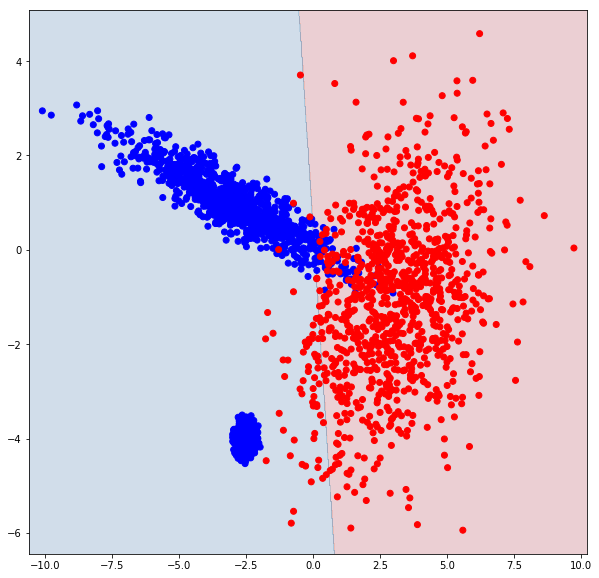

In [297]:
plt.figure(figsize=(10, 10))

cm = plt.cm.RdBu

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.2)

colors = ['b' if y == 1. else 'r' for y in Y_test]
plt.scatter([x[0] for x in X_test], [x[1] for x in X_test], c=colors)
    
plt.show()

### Linear regression

In [298]:
clf = LinearClassifier().fit(X_train, Y_train)

#### Predict

In [299]:
Y_train_pred = clf.predict(X_train)

In [300]:
Y_pred = clf.predict(X_test)

In [301]:
print('Accuracy on training set: {}'.format(accuracy_score(Y_train_pred, Y_train)))

Accuracy on training set: 0.945


In [302]:
print('Accuracy on test set: {}'.format(accuracy_score(Y_pred, Y_test)))

Accuracy on test set: 0.9576666666666667


#### Plot

In [303]:
h = .02  # step size in the mesh

x_min, x_max = min([x[0] for x in X_test]) - .5, max([x[0] for x in X_test]) + .5
y_min, y_max = min([x[1] for x in X_test]) - .5, max([x[1] for x in X_test]) + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

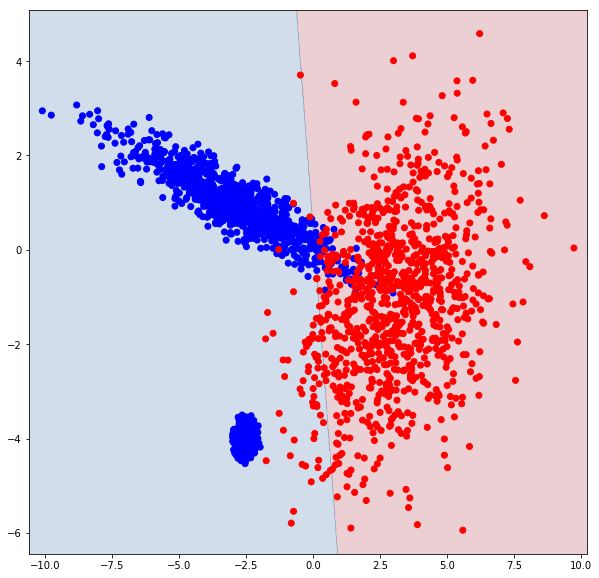

In [304]:
plt.figure(figsize=(10, 10))

cm = plt.cm.RdBu

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.2)

colors = ['b' if y == 1. else 'r' for y in Y_test]
plt.scatter([x[0] for x in X_test], [x[1] for x in X_test], c=colors)
    
plt.show()

### Results summary

In [305]:
lda_train_accuracy, lda_test_accuracy = 0.9475, 0.9606666666666667
logistic_train_accuracy, logistic_test_accuracy = 0.945, 0.9586666666666667 
linear_train_accuracy, linear_test_accuracy = 0.945, 0.9576666666666667

__Comment__: the LDA classifier gives the best accuracies for both the training and test set, although it's weird that the later is better than the former. One should pick it but do not expect that the 96.06% accuracy rate will be attained in real data.

From the visualization, we can see that:

- the data is not linearly separable;

- the classes could have been generated by 3 Gaussian distributions with different covariance matrices. 

These observations, specially the second one, contradict basic assumptions of LDA. We should be very happy to still have 96.06% accuracy on the test set.

### QDA

In [366]:
clf = QDAClassifier().fit(X_train, Y_train)

Estimated pi = 0.625
Estimated mu_0 = [ 2.79304824 -0.83838667]
Estimated mu_1 = [-2.94232885 -0.9578284 ]
Estimated Sigma_0 = [[2.89913927 1.24581553]
 [1.24581553 2.92475448]]
Estimated Sigma_1 = [[ 2.86914403 -1.76197061]
 [-1.76197061  6.56438626]]


#### Predict

In [367]:
Y_train_pred = clf.predict(X_train)

In [368]:
Y_pred = clf.predict(X_test)

In [369]:
print('Accuracy on training set: {}'.format(accuracy_score(Y_train_pred, Y_train)))

Accuracy on training set: 0.955


In [370]:
print('Accuracy on test set: {}'.format(accuracy_score(Y_pred, Y_test)))

Accuracy on test set: 0.9643333333333334


#### Plot

In [371]:
h = .02  # step size in the mesh

x_min, x_max = min([x[0] for x in X_test]) - .5, max([x[0] for x in X_test]) + .5
y_min, y_max = min([x[1] for x in X_test]) - .5, max([x[1] for x in X_test]) + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

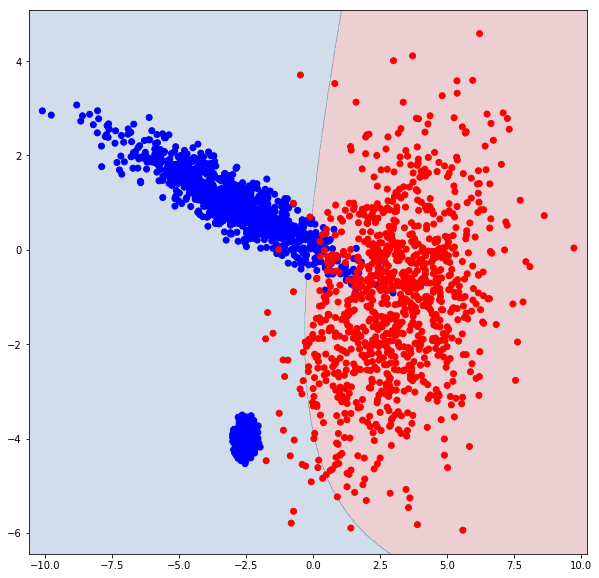

In [374]:
plt.figure(figsize=(10, 10))

cm = plt.cm.RdBu

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.2)

colors = ['b' if y == 1. else 'r' for y in Y_test]
plt.scatter([x[0] for x in X_test], [x[1] for x in X_test], c=colors)
    
plt.show()

#### Comments

This dataset is not linearly separable, so the LDA model was not able to discriminate correctly for some points.

On the other hand, the QDA model also failed to find the correct natural regions because it assumes that each class is generated by a single Gaussian distribution. However, for this dataset, the class $1$ is generated from two Gaussian distributions.

In spite of this, QDA still gave better accuracies than the other models for both training and test sets.